In [1]:
using BOMBs
using Plots

In [2]:
versionBOMBS()


                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  

In [3]:
infoAll()

Sorry, but the only allowed input to this function is a string :(


Please, if you want information about one of the package structures, type:
    1) "model" for the model generation section
    2) "simulation", "simulation" or "simul" for the model simulation section
    3) "pseudo-data", "pseudodata", "pseudo data" for the model pseudo-data generation section
    4) "mle", "likelihood" for the maximum likelihood estimation section
    5) "inference", "stan", "stan inference", "staninference" for the Bayesian parameter inference section
    5b) "turing", "turing inference", "turinginference" for the Bayesian parameter inference section using Turing.jl
    6) "oedms", "model selection", "modelselection", "oed model selection" for the optimal experimental design for model selection section
    7) "oedmc", "model calibration", "modelcalibration", "oed model calibration" for the optimal experimental design for model calibration section

        

In [3]:
infoAll("model")



                CALL defModStruct()

model_def["NameF"] = [];
        # String containing the name of the model. Scripts and results will be stored using this name

model_def["nStat"] = [];
        # Integer indicating the total number of steps of the model.

model_def["nPar"] = [];
        # Integer indicating the total number of parameters of the model.

model_def["nInp"] = [];
        # Integer indicating the total number of stimuli (inducers) of the model. If the model has no inputs, set it to 0.

model_def["stName"] = [];
        # Vector of strings indicating the name of all the states of the model (without a d letter in front).

model_def["parName"] = [];
        # Vector of strings indicating the name of all the parameters of the model.

model_def["inpName"] = [];
        # Vector of strings indicating the name of all the stimuli (inducers) of the model. If the model has no inputs
        # just give an empty vector.

model_def["eqns"] = [];
        # Vector of strings contai

# Generate Model Scipts

In [2]:
model_def = defModStruct()

Dict{Any, Any} with 12 entries:
  "stName"  => Any[]
  "inpName" => Any[]
  "solver"  => Any[]
  "nPar"    => Any[]
  "NameF"   => Any[]
  "nInp"    => Any[]
  "nStat"   => Any[]
  "eqns"    => Any[]
  "Y0eqs"   => Any[]
  "Y0Sim"   => Any[]
  "parName" => Any[]
  "tols"    => Any[]

$$ \frac{d\mathrm{[mRNA]}}{dt} = \alpha + \frac{V_m}{1 + (\frac{\mathrm{[P_T]}}{K_M} \frac{\mathrm{[U]}^{n_2}}{K_{M2}^{n_2}+\mathrm{[U]}^{n_2}})^{n_1}} - d_1\mathrm{[mRNA]} $$ 
$$ \frac{d\mathrm{[P_T]}}{dt} = k_m\mathrm{[mRNA]} - d_2\mathrm{[P_T]} $$

In [4]:
model_def["NameF"] = ["JuliaConExamp"];
model_def["nStat"] = [2];
model_def["nPar"] = [4];
model_def["nInp"] = [1];
model_def["stName"] = ["mRNA","Prot"];
model_def["inpName"] = ["U"];
model_def["parName"] = ["n1","KM2",
                        "d2","km"];

model_def["eqns"] = ["dmRNA = 1 + (200 / (1 + ((Prot/20)*((U^2)/((KM2^2)+(U^2))))^n1)) - 0.5*mRNA",
                    "dProt = km*mRNA - d2*Prot"]

model_def["Y0eqs"] = []; 
model_def["Y0Sim"] = [];

model_def["tols"] = [1e-9, 1e-9];
model_def["solver"] = "CVODE_BDF";

In [6]:
model_def["nInp"] = [2];
GenerateModel(model_def)

-------------------------- Process STOPPED!!! --------------------------
Please, check inpName and nInp, they do not make sense


LoadError: MethodError: no method matching getindex(::Nothing, ::String)

In [5]:
model_def["nInp"] = [1];
model_def = GenerateModel(model_def)


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_Model.jl
--------------------------------------------------------------------------------------



Dict{Any, Any} with 13 entries:
  "stName"    => ["mRNA", "Prot"]
  "modelpath" => "e:\\UNI\\D_Drive\\PhD\\Year_1\\2022_06_23_JuliaCon2022\\Model…
  "inpName"   => ["U"]
  "solver"    => "CVODE_BDF"
  "nPar"      => 4
  "NameF"     => "JuliaConExamp"
  "nInp"      => 1
  "nStat"     => 2
  "eqns"      => ["dmRNA = 1 + (200 / (1 + ((Prot/20)*((U^2)/((KM2^2)+(U^2))))^…
  "Y0eqs"     => Any[]
  "Y0Sim"     => false
  "parName"   => ["n1", "KM2", "d2", "km"]
  "tols"      => [1.0e-9, 1.0e-9]

# Model Simulation

In [5]:
simul_def = defSimulStruct()

Dict{Any, Any} with 10 entries:
  "uInd"      => Any[]
  "theta"     => Any[]
  "tsamps"    => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "switchT"   => Any[]
  "Nexp"      => Any[]
  "y0"        => Any[]
  "preInd"    => Any[]
  "finalTime" => Any[]

In [6]:
simul_def["Nexp"] = [2]; 
simul_def["finalTime"] = [60, 60]; 
simul_def["switchT"] = [[0, 20, 40, 60],[0, 20, 40, 60]]; 
simul_def["y0"] = [[10,100],[500,1500]]; 
simul_def["preInd"] = [[0],[0]]; 
simul_def["uInd"] = [Array([0, 100, 0]'),Array([100, 0, 100]')]; 
simul_def["theta"] = [3,10,0.8,3]; # Could be the directory and file name of a csv.
simul_def["tsamps"] = [collect(0:1:60),collect(0:1:60)];
simul_def["plot"] = [true];
simul_def["flag"] = ["JuliaConSimulationExamp"];

In [8]:
simuls, model_def, simul_def = simulateODEs(model_def, simul_def);


----------------------------------------- PLOTS -----------------------------------------
Simulation PLOTS are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the name PlotSimulation_Exp(i)_JuliaConSimulationExamp.png
--------------------------------------------------------------------------------------


----------------------------------------- RESULTS -----------------------------------------
Simulation results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the name JuliaConExamp_2022-06-29_SimulationResults_JuliaConSimulationExamp.jld
--------------------------------------------------------------------------------------



In [11]:
simuls

Dict{Any, Any} with 2 entries:
  "Exp_1" => [10.0 100.0; 164.24 258.839; … ; 401.971 1507.21; 401.982 1507.33;…
  "Exp_2" => [500.0 1500.0; 304.053 1460.99; … ; 16.2 60.7467; 16.195 60.7419;;…

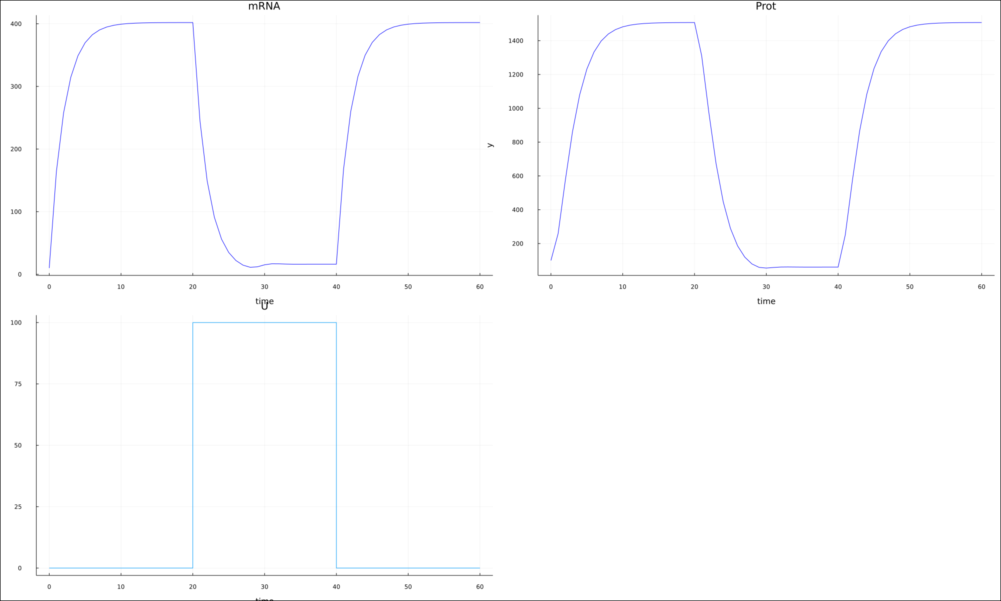

In [10]:
using Images
exp1 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",1,"_",simul_def["flag"],".png"))

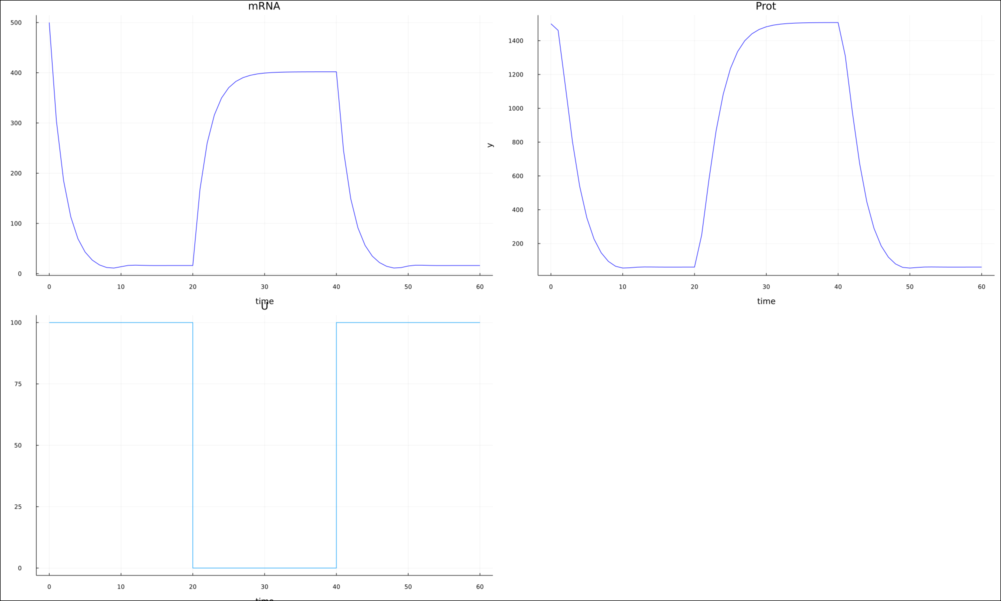

In [14]:
exp2 = load(string(simul_def["savepath"], "\\PlotSimulation_Exp",2,"_",simul_def["flag"],".png"))

# Generate Pseudo-Data

In [96]:
pseudo_def = defPseudoDatStruct();

In [97]:
pseudo_def["Nexp"] = [2]; 
pseudo_def["finalTime"] = [60, 60]; 
pseudo_def["switchT"] = [[0, 20, 40, 60],[0, 20, 40, 60]]; 
pseudo_def["y0"] = [[10,100],[500,1500]]; 
pseudo_def["preInd"] = [[0],[0]]; 
pseudo_def["uInd"] = [Array([0, 100, 0]'),Array([100, 0, 100]')]; 
pseudo_def["theta"] = [3,10,0.8,3]; # Could be the directory and file name of a csv.
pseudo_def["tsamps"] = [collect(0:1:60),collect(0:1:60)];
pseudo_def["plot"] = [true];
pseudo_def["flag"] = ["JuliaConPseudoDatExamp"];


pseudo_def["Obs"] = ["Prot"]; 
pseudo_def["NoiseType"] = ["hetero"];
pseudo_def["Noise"] = [0.1];

In [15]:
pseudo_res, model_def, pseudo_def = GenPseudoDat(model_def, pseudo_def);


----------------------------------------- RESULTS -----------------------------------------
Pseudo-Data results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-28
Under the name JuliaConExamp_2022-06-28_PseudoDataResults_JuliaConPseudoDatExamp.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
Pseudo-Data PLOTS are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-28
Under the name PlotPseudoDat_Exp(i)_JuliaConPseudoDatExamp.png
If more than one sample from the parameters are used, the plot will be the average between all traces.
--------------------------------------------------------------------------------------


----------------------------------------- CSVs -----------------------------------------
Pse

In [16]:
pseudo_res

Dict{Any, Any} with 4 entries:
  "SimsObs" => Dict{Any, Any}("PDExp_2"=>[1500.0; 1460.99; … ; 60.7467; 60.7419…
  "Sims"    => Dict{Any, Any}("Exp_1"=>[10.0 100.0; 164.24 258.839; … ; 401.971…
  "PData"   => Dict{Any, Any}("PDExp_2"=>[1290.95; 1437.91; … ; 55.2515; 63.723…
  "PError"  => Dict{Any, Any}("PDExp_2"=>[150.0; 146.099; … ; 6.07467; 6.07419;…

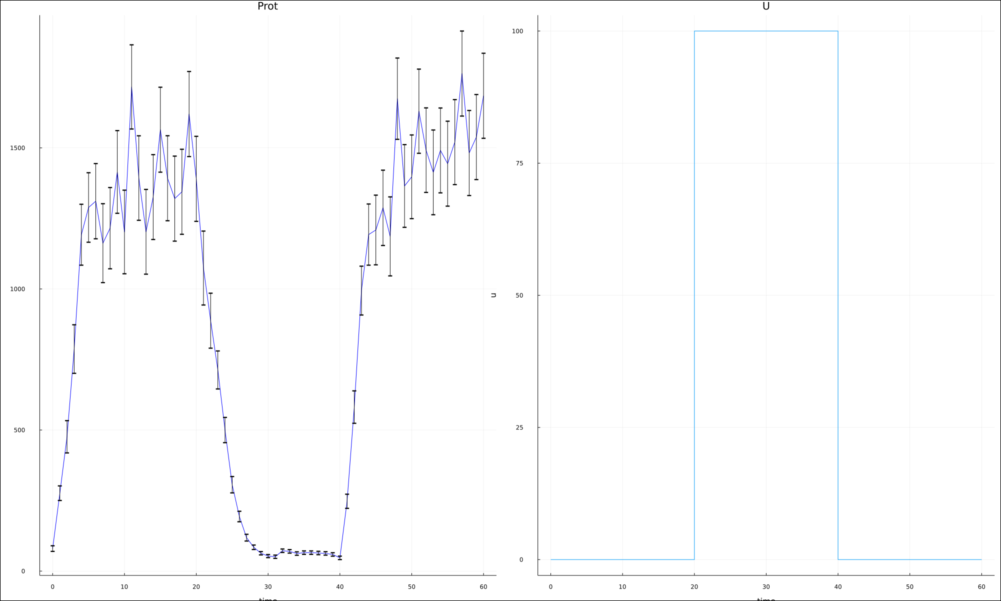

In [17]:
exp1 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",1,"_",pseudo_def["flag"],".png"))

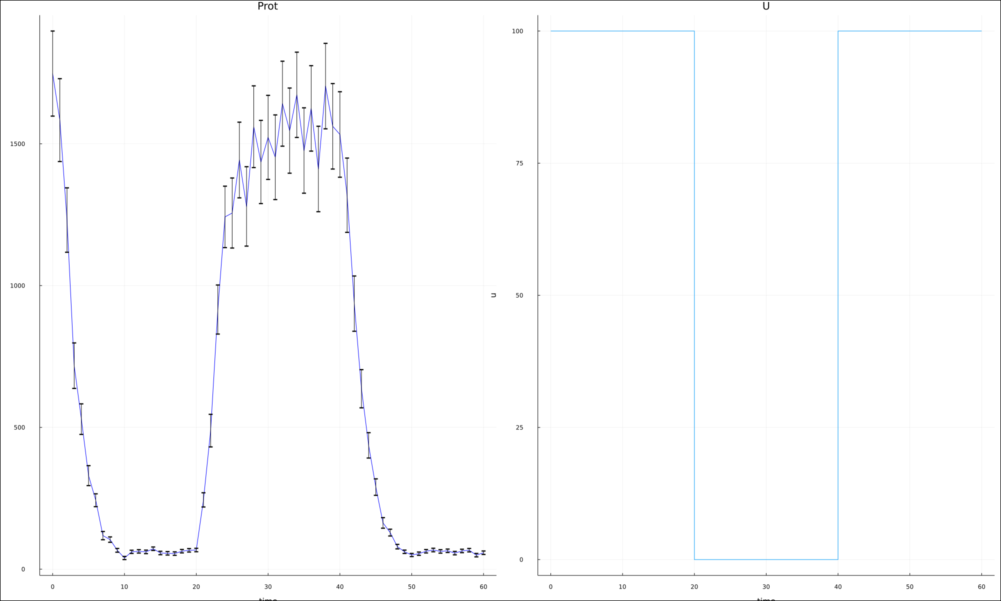

In [20]:
exp2 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",2,"_",pseudo_def["flag"],".png"))

# Maximum Likelihood Estimation

In [18]:
mle_def = defMLEStruct()

Dict{Any, Any} with 19 entries:
  "thetaMIN"     => Any[]
  "parallel"     => Any[]
  "DataError"    => Any[]
  "OPTsolver"    => Any[]
  "Nexp"         => Any[]
  "MaxTime"      => Any[]
  "y0"           => Any[]
  "uInd"         => Any[]
  "thetaMAX"     => Any[]
  "Obs"          => Any[]
  "switchT"      => Any[]
  "preInd"       => Any[]
  "finalTime"    => Any[]
  "MaxFuncEvals" => Any[]
  "tsamps"       => Any[]
  "flag"         => Any[]
  "plot"         => Any[]
  "DataMean"     => Any[]
  "runs"         => Any[]

In [19]:
mle_def = SimToMle(mle_def, pseudo_def)

Dict{Any, Any} with 19 entries:
  "thetaMIN"     => Any[]
  "parallel"     => Any[]
  "DataError"    => Any[]
  "OPTsolver"    => Any[]
  "Nexp"         => 2
  "MaxTime"      => Any[]
  "y0"           => [[10, 100], [500, 1500]]
  "uInd"         => [[0 100 0], [100 0 100]]
  "thetaMAX"     => Any[]
  "Obs"          => [2]
  "switchT"      => [[0, 20, 40, 60], [0, 20, 40, 60]]
  "preInd"       => [[0], [0]]
  "finalTime"    => [60, 60]
  "MaxFuncEvals" => Any[]
  "tsamps"       => [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  51, 52, 53, 54, 55, 56, …
  "flag"         => "JuliaConPseudoDatExamp"
  "plot"         => true
  "DataMean"     => Any[]
  "runs"         => Any[]

In [23]:
mle_def["flag"] = "JuliaConMLEExamp"

mle_def["thetaMAX"] = [5.0,30.0,1.0,5.0]; # Allways as Floats!
mle_def["thetaMIN"] = [1.0,1.0,0.01,1.0]; 
mle_def["runs"] = [1]; 
mle_def["parallel"] = [false]; 

# For the two following fields, you can introduce a string pointing to the observable files (same strings in)
#     both fields having the same structure as the ones generated in the PseudoData section. If multiple theta are
#     considered in the file, then the covariance matrix will be taken. 
mle_def["DataMean"] = [string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def["flag"], "_Observables.csv"),
                       string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",2,"_",pseudo_def["flag"], "_Observables.csv")]; 
mle_def["DataError"] = mle_def["DataMean"]; 

mle_def["Obs"] = ["Prot"]; 

# BlackBoxOptim
mle_def["OPTsolver"] = []; 
mle_def["MaxTime"] = [2*60]; # Note that this is selected with a low value to allow the example to run quickly. This will lead to sub-optimal solutions.
mle_def["MaxFuncEvals"] = []; 

In [24]:
mle_res, model_def, mle_def = MLEtheta(model_def, mle_def);


----------------------------------------- SCRIPTS -----------------------------------------
MLE scripts have been generated in the directory: 
         e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-28\MLEscripts\JuliaConExamp_MLE.jl
--------------------------------------------------------------------------------------

----------------------------------------- OPTIMISATION STARTS! -----------------------------------------
 91.360900 seconds (530.41 M allocations: 17.701 GiB, 6.91% gc time, 2.23% compilation time)
----------------------------------------- OPTIMISATION ENDED -----------------------------------------

----------------------------------------- RESULTS -----------------------------------------
MLE results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-28
Under the name JuliaConExamp_2022-06-28_MLEresults_JuliaConMLEExamp.jld
-------------------------------------

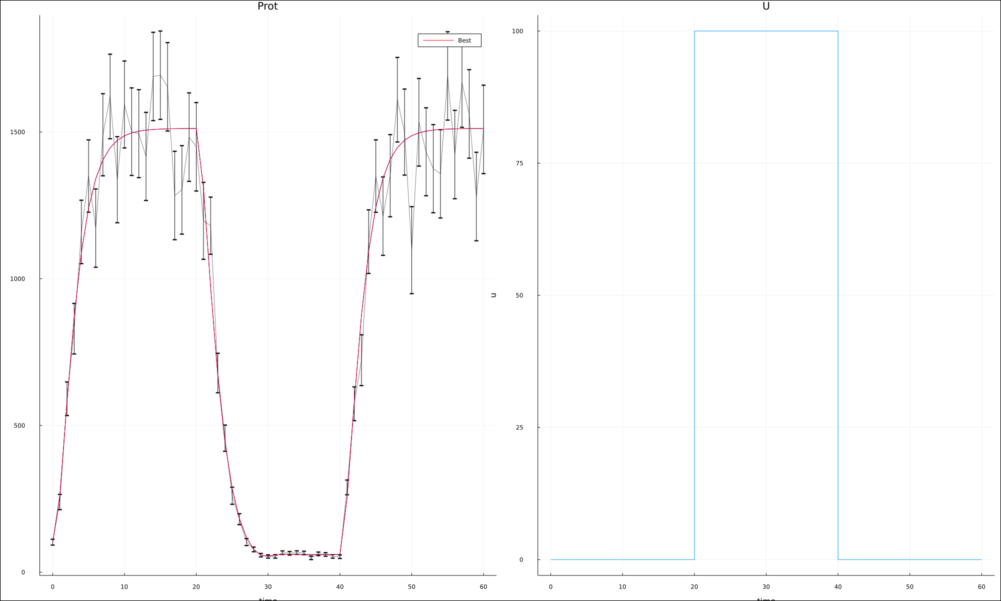

In [26]:
exp1 = load(string(mle_def["savepath"], "\\PlotMLEResults_Exp",1,"_",mle_def["flag"],".png"))

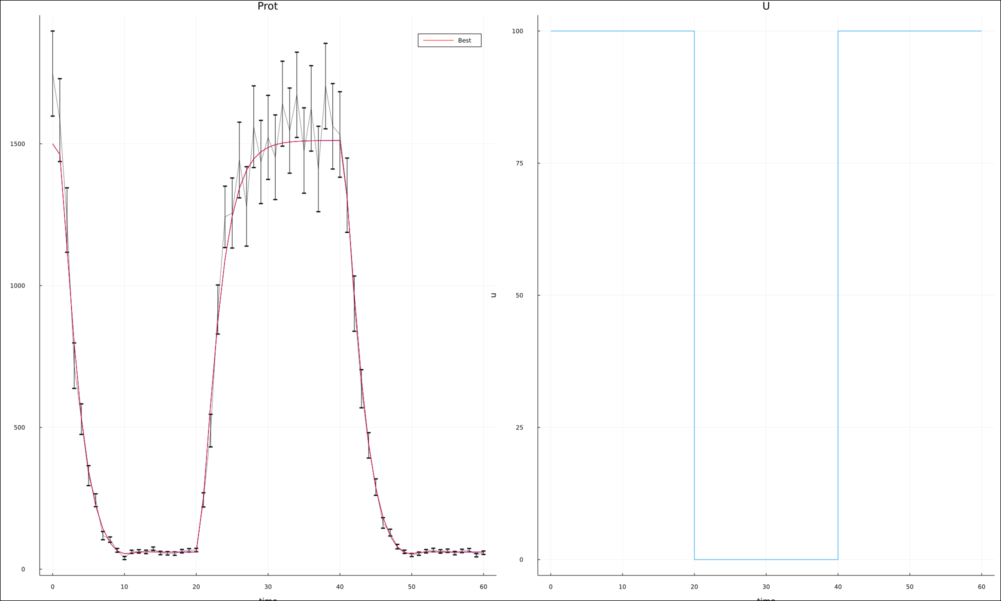

In [27]:
exp2 = load(string(mle_def["savepath"], "\\PlotMLEResults_Exp",2,"_",mle_def["flag"],".png"))

# Bayesian Inference Using Stan

In [20]:
bayinf_def = defBayInfStruct()

Dict{Any, Any} with 7 entries:
  "Priors"       => Any[]
  "StanSettings" => Any[]
  "flag"         => Any[]
  "plot"         => Any[]
  "Data"         => Any[]
  "runInf"       => Any[]
  "MultiNormFit" => Any[]

In [21]:
bayinf_def["Data"] = defBayInfDataFromFilesStruct();
bayinf_def["StanSettings"] = defBasicStanSettingsStruct(); 
bayinf_def["flag"] = ["JuliaConBayInfStan"]; 
bayinf_def["plot"] = [true]; 
bayinf_def["runInf"] = [true];
bayinf_def["MultiNormFit"] = [];

In [22]:
bayinf_def["Data"]["Observables"] = [string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def["flag"], "_Observables.csv"),
                                     string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",2,"_",pseudo_def["flag"], "_Observables.csv")]; 
bayinf_def["Data"]["Inputs"] = [string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def["flag"], "_Event_Inputs.csv"),
                                string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",2,"_",pseudo_def["flag"], "_Event_Inputs.csv")]; 
bayinf_def["Data"]["Obs"] = ["Prot"];
bayinf_def["Data"]["y0"] = [[10,100],[500,1500]];

In [23]:
bayinf_def["StanSettings"]["cmdstan_home"] = ["C:/Users/David/.cmdstanpy/cmdstan-2.20.0"];
bayinf_def["StanSettings"]["nchains"] = [4];
bayinf_def["StanSettings"]["nsamples"] = [1000];
bayinf_def["StanSettings"]["nwarmup"] = [500];
bayinf_def["StanSettings"]["printsummary"] = [true]; 
bayinf_def["StanSettings"]["maxdepth"] = [10];
bayinf_def["StanSettings"]["adaptdelta"] = [0.85];
bayinf_def["StanSettings"]["jitter"] = [0.5];
bayinf_def["StanSettings"]["init"] = [];

In [24]:
bayinf_def["Priors"] = [5.0 30.0 1.0 5.0;
                        1.0 1.0 0.01 1.0]; 

In [41]:
stan_res, model_def, bayinf_def = StanInfer(model_def, bayinf_def);

----------------------------------------- STAN INFERENCE INFO -----------------------------------------
Inference will be performed since there is enough information from the user:
Stan temporary files will be stored in your current working directory in the folder tmp.
--------------------------------------------------------------------------------------
-------------------------- WARNING!!! --------------------------
Please, be careful with the definition of parameters, transformations and prior distributions.
No check will be done in this section.

----------------------------------------- STAN MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_StanModel.stan
--------------------------------------------------------------------------------------


File e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\tmp\JuliaConExamp_Stan_JuliaConBa

In [42]:
stan_res

Dict{Any, Any} with 7 entries:
  "Init"      => Any[]
  "StanModel" =>   name =                    "JuliaConExamp_Stan_JuliaConBayInf…
  "cnames"    => ["lp__", "accept_stat__", "stepsize__", "treedepth__", "n_leap…
  "posterior" => [3.01647 14.3192 0.791109 2.94365; 3.11383 14.0817 0.793292 2.…
  "Model"     => "\n\nfunctions{\n\n    real[] JuliaConExamp_ODEs(real t, real[…
  "chains"    => [-65.0129 0.975592 … 0.791109 2.94365; -64.2484 0.982297 … 0.7…
  "InferData" => Dict{String, Any}("Means"=>[81.7029 1601.04; 237.328 1462.04; …

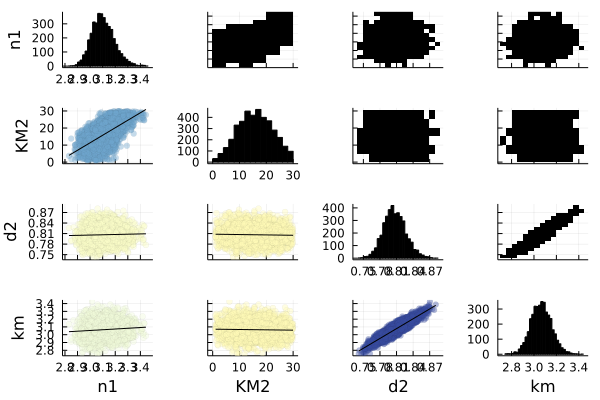

In [43]:
using Dates
PO1 = load(string("Results\\",model_def["NameF"],"_",today(),"\\PosteriorPlots_",bayinf_def["flag"],".png"))

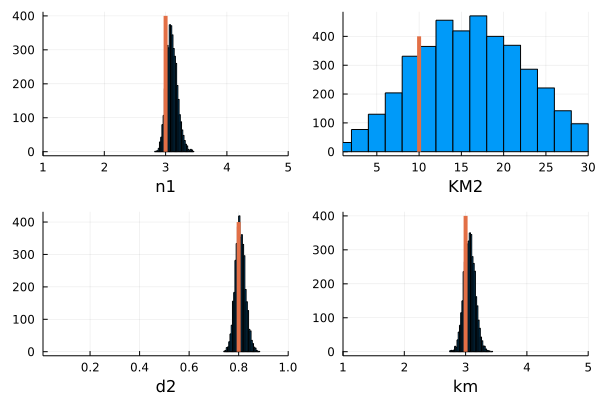

In [31]:
p1 = histogram(stan_res["posterior"][:,1], label = "", xlabel = "n1", xlim = (1,5))
plot!([simul_def["theta"][1], simul_def["theta"][1]], [0,400], label = "", linewidth = 4)
p2 = histogram(stan_res["posterior"][:,2], label = "", xlabel = "KM2", xlim = (1,30))
plot!([simul_def["theta"][2], simul_def["theta"][2]], [0,400], label = "", linewidth = 4)
p3 = histogram(stan_res["posterior"][:,3], label = "", xlabel = "d2", xlim = (0.01,1))
plot!([simul_def["theta"][3], simul_def["theta"][3]], [0,400], label = "", linewidth = 4)
p4 = histogram(stan_res["posterior"][:,4], label = "", xlabel = "km", xlim = (1,5))
plot!([simul_def["theta"][4], simul_def["theta"][4]], [0,400], label = "", linewidth = 4)

plot(p1,p2,p3,p4)

# Bayesian Inference Using Turing.jl

In [37]:
turinf_def = defTurInfStruct()

Dict{Any, Any} with 6 entries:
  "Priors"       => Any[]
  "flag"         => Any[]
  "plot"         => Any[]
  "Data"         => Any[]
  "Trunc"        => Any[]
  "MultiNormFit" => Any[]

In [38]:
turinf_def["Data"] = defBayInfDataFromFilesStruct();
turinf_def["flag"] = ["test"]; 
turinf_def["plot"] = [true]; 
turinf_def["MultiNormFit"] = [];

In [39]:
turinf_def["Data"]["Observables"] = [string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def["flag"], "_Observables.csv"),
                                     string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",2,"_",pseudo_def["flag"], "_Observables.csv")]; 
turinf_def["Data"]["Inputs"] = [string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def["flag"], "_Event_Inputs.csv"),
                                string(pseudo_def["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",2,"_",pseudo_def["flag"], "_Event_Inputs.csv")]; 
turinf_def["Data"]["Obs"] = ["Prot"];
turinf_def["Data"]["y0"] = [[10,100],[500,1500]];

In [40]:
turinf_def["Priors"] = [5.0 30.0 1.0 5.0;
                        1.0 1.0 0.01 1.0]; 

In [41]:
model_def["solver"] = []

Any[]

In [42]:
turing_res, model_def, turinf_def = TuringInfer(model_def, turinf_def);

----------------------------------------- TURING INFERENCE INFO -----------------------------------------
Remember, NO inference will be performed within BOMBs. Structure elements
to run the Turing inference will be given instead.
--------------------------------------------------------------------------------------

----------------------------------------- TURING MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_TuringModel.jl
--------------------------------------------------------------------------------------


----------------------------------------- TURING INFERENCE INFO -----------------------------------------
Remember, Turing inference will NOT be initialised. Once you are ready, please run Turing with your desired settings 
To include your generated functions into your environment just run: 
         include("e:\\UNI\\D_Dr

In [43]:
include("E:\\UNI\\D_Drive\\PhD\\Year_1\\2022_06_23_JuliaCon2022\\ModelsFunctions\\JuliaConExamp_TuringModel.jl")

JuliaConExamp_TuringModel (generic function with 1 method)

In [44]:
model = JuliaConExamp_TuringModel(turing_res["turinf_def"]["Data"],turing_res["probExamp"]);

In [57]:
chainss = sample(model, NUTS(500, .65), MCMCThreads(), 1500, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\david\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\david\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\david\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\david\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = 

Chains MCMC chain (1000×16×4 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 4
Samples per chain = 1000
parameters        = p1, p2, p3, p4
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

          p1    3.0765    0.0895     0.0014    0.0019   2030.5358    1.0008
          p2   15.8973    6.2920     0.0995    0.1365   1993.0449    1.0007
          p3    0.8009    0.0203     0.0003    0.0004   1728.1038    0.9998
          p4    2.9841    0.0903     0.0014    0.0018   1639.3152    0.9998

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          p1    

┌ Warning: timestamp of type Nothing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains.jl:364
┌ Warning: timestamp of type Nothing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains.jl:364
┌ Warning: timestamp of type Nothing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains.jl:364
┌ Warning: timestamp of type Nothing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains C:\Users\david\.julia\packages\MCMCChains\IKF6o\src\chains

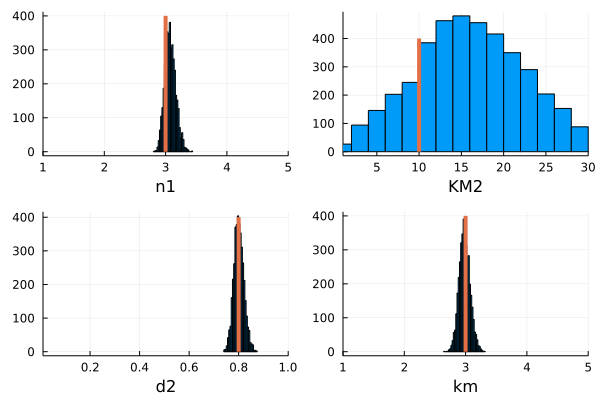

In [61]:
p1 = histogram(Poster[:,1], label = "", xlabel = "n1", xlim = (1,5))
plot!([simul_def["theta"][1], simul_def["theta"][1]], [0,400], label = "", linewidth = 4)
p2 = histogram(Poster[:,2], label = "", xlabel = "KM2", xlim = (1,30))
plot!([simul_def["theta"][2], simul_def["theta"][2]], [0,400], label = "", linewidth = 4)
p3 = histogram(Poster[:,3], label = "", xlabel = "d2", xlim = (0.01,1))
plot!([simul_def["theta"][3], simul_def["theta"][3]], [0,400], label = "", linewidth = 4)
p4 = histogram(Poster[:,4], label = "", xlabel = "km", xlim = (1,5))
plot!([simul_def["theta"][4], simul_def["theta"][4]], [0,400], label = "", linewidth = 4)

plot(p1,p2,p3,p4)

# Optimal Experimental Design for Model Selection

In [11]:
model_def2 = defModStruct()

Dict{Any, Any} with 12 entries:
  "stName"  => Any[]
  "inpName" => Any[]
  "solver"  => Any[]
  "nPar"    => Any[]
  "NameF"   => Any[]
  "nInp"    => Any[]
  "nStat"   => Any[]
  "eqns"    => Any[]
  "Y0eqs"   => Any[]
  "Y0Sim"   => Any[]
  "parName" => Any[]
  "tols"    => Any[]

In [12]:
model_def2["NameF"] = ["JuliaConExampModel2"];
model_def2["nStat"] = [2];
model_def2["nPar"] = [4];
model_def2["nInp"] = [1];
model_def2["stName"] = ["mRNA","Prot"];
model_def2["inpName"] = ["U"];
model_def2["parName"] = ["n1","KM2",
                        "d2","km"];

model_def2["eqns"] = ["dmRNA = 1 + (200 / (1 + ((Prot/20)*((U^1)/((KM2^1)+(U^1))))^n1)) - 0.5*mRNA",
                    "dProt = km*mRNA - d2*Prot"]

model_def2["Y0eqs"] = []; 
model_def2["Y0Sim"] = [];

model_def2["tols"] = [1e-9, 1e-9];
model_def2["solver"] = "CVODE_BDF";

In [13]:
model_def2 = GenerateModel(model_def2)


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExampModel2_Model.jl
--------------------------------------------------------------------------------------



Dict{Any, Any} with 13 entries:
  "stName"    => ["mRNA", "Prot"]
  "modelpath" => "e:\\UNI\\D_Drive\\PhD\\Year_1\\2022_06_23_JuliaCon2022\\Model…
  "inpName"   => ["U"]
  "solver"    => "CVODE_BDF"
  "nPar"      => 4
  "NameF"     => "JuliaConExampModel2"
  "nInp"      => 1
  "nStat"     => 2
  "eqns"      => ["dmRNA = 1 + (200 / (1 + ((Prot/20)*((U^1)/((KM2^1)+(U^1))))^…
  "Y0eqs"     => Any[]
  "Y0Sim"     => false
  "parName"   => ["n1", "KM2", "d2", "km"]
  "tols"      => [1.0e-9, 1.0e-9]

Multiple Parameter Samples: 
$$ dB(P(h|D, M_{\alpha}), \; P(h|D, M_{\beta})) = \\
        \frac{1}{8} \; (\mu_{\beta} - \mu_{\alpha})^T \left[ \frac{\Sigma_{\alpha}+\Sigma_{\beta}}{2} \right]^{-1} (\mu_{\beta} - \mu_{\alpha}) + \frac{1}{2} \; log \left( \frac{|(\Sigma_{\alpha}+ \Sigma_{\beta})/2|}{|\Sigma_{\alpha}|^{\frac{1}{2}}|\Sigma_{\beta}|^{\frac{1}{2}}} \right) $$

Best Parameter Sample: 
$$ d(M_{\alpha}, M_{\beta}) = \sqrt{\sum_{s=1}^{S} (y^{s,o}_{\alpha}(\theta_{\alpha}, u) - y^{s,o}_{\beta}(\theta_{\beta}, u))} $$

In [14]:
oedms_def = defODEModelSelectStruct()

Dict{Any, Any} with 21 entries:
  "Theta_M2"  => Any[]
  "maxiter"   => Any[]
  "y0_M2"     => Any[]
  "fixedStep" => Any[]
  "preInd_M1" => Any[]
  "fixedInp"  => Any[]
  "Model_1"   => Any[]
  "Obs"       => Any[]
  "uUpper"    => Any[]
  "Model_2"   => Any[]
  "switchT"   => Any[]
  "preInd_M2" => Any[]
  "finalTime" => Any[]
  "y0_M1"     => Any[]
  "equalStep" => Any[]
  "Theta_M1"  => Any[]
  "tsamps"    => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "uLower"    => Any[]
  "maxtime"   => Any[]

In [18]:
oedms_def["Model_1"] = [model_def]; 
oedms_def["Model_2"] = [model_def2]; 
oedms_def["Obs"] = ["Prot"]; 
oedms_def["Theta_M1"] = stan_res["posterior"][1:400,:]; 
oedms_def["Theta_M2"] = stan_res["posterior"][1:400,:]; 

oedms_def["y0_M1"] = [10,100]; 
oedms_def["y0_M2"] = [10,100];  
oedms_def["preInd_M1"] = [0]; 
oedms_def["preInd_M2"] = [0]; 
oedms_def["finalTime"] = [60]; 
oedms_def["switchT"] = [[0, 20, 40, 60]];
oedms_def["tsamps"] = [collect(0:1:60)];
oedms_def["fixedInp"] = []; 
oedms_def["fixedStep"] = []; 
oedms_def["equalStep"] = [];

oedms_def["plot"] = [true]; 
oedms_def["flag"] = ["JuliaConOEDms"];



oedms_def["uUpper"] = [100];
oedms_def["uLower"] = [0];
oedms_def["maxiter"] = [100];

In [19]:
oedms_def = genOptimMSFuncts(oedms_def);


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_Model.jl
--------------------------------------------------------------------------------------


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExampModel2_Model.jl
--------------------------------------------------------------------------------------


----------------------------------------- SCRIPTS OED Model Selection -----------------------------------------
Utility function script to perform OED for Model Selection has been generated in the directory: 
e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_VS_JuliaConExampModel2_2

In [20]:
# BayesianOptimization.jl
oedms_res, oedms_def = mainOEDMS(oedms_def);

┌ Warning: use values(kwargs) and keys(kwargs) instead of kwargs.data and kwargs.itr
│   caller = #MAPGPOptimizer#19 at gp.jl:37 [inlined]
└ @ Core C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\models\gp.jl:37
┌ Info: 2022-06-29T10:36:57.886	iteration: 15	current optimum: 23.793081383238697
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T10:37:03.316	iteration: 16	current optimum: 23.793081383238697
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T10:37:04.336	iteration: 17	current optimum: 23.793081383238697
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T10:37:05.592	iteration: 18	current optimum: 23.793081383238697
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimi


----------------------------------------- RESULTS -----------------------------------------
OED for Model Selection results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_VS_JuliaConExampModel2_2022-06-29
Under the name OEDModelSelectResults_JuliaConOEDms.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_VS_JuliaConExampModel2_2022-06-29
Under the names PlotOEDMSResults_Exp1_JuliaConOEDms.png and Plot_OEDMSConvergence_JuliaConOEDms.png
--------------------------------------------------------------------------------------



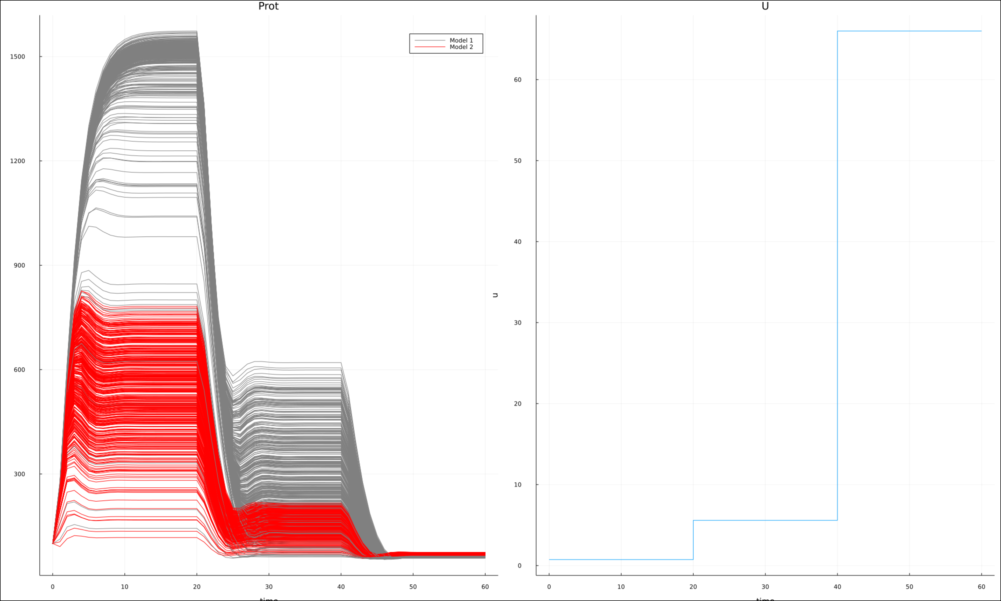

In [22]:
exp1 = load(string("Results\\",model_def["NameF"],"_VS_",model_def2["NameF"],"_",today(),"\\PlotOEDMSResults_Exp1","_",oedms_def["flag"],".png"))

# Optimal Experimental Design for Model Inference

In [79]:
using Distributions
using Random
Random.seed!(1223884)

p1 = Truncated(Distributions.Normal(3.0, 1.0), 1.0, 5.0)
p2 = Truncated(Distributions.Normal(15.5, 7.25), 1.0, 30.0)
p3 = Truncated(Distributions.Normal(0.505, 0.2475), 0.01, 1.0)
p4 = Truncated(Distributions.Normal(3.0, 1.0), 1.0, 5.0)

prior = hcat(rand(p1,400),rand(p2,400),rand(p3,400),rand(p4,400));



Prediction Posterior: 
$$ P(h|D) = \int P(h|\theta)P(\theta|D) \; d \theta $$

Prediction Uncertainty Assessment: 

Option 1: 
$$ PU_e^C = \frac{1}{O} \sum_{o=1}^{O} \sum_{s=1}^{S} y(P(\theta|D))^{per=99.5}_{s,o} - y(P(\theta|D))^{per=0.5}_{s,o} $$

Option 2: 
$$ PU_e^E = \frac{1}{O} \sum_{o=1}^{O} \sum_{s=1}^{S} H(y(P(\theta|D))_{s,o}) $$

In [80]:
oedmc_def = defODEModelCalibrStruct()

Dict{Any, Any} with 18 entries:
  "maxiter"   => Any[]
  "y0"        => Any[]
  "fixedStep" => Any[]
  "fixedInp"  => Any[]
  "Obs"       => Any[]
  "uUpper"    => Any[]
  "switchT"   => Any[]
  "Model"     => Any[]
  "preInd"    => Any[]
  "finalTime" => Any[]
  "uLower"    => Any[]
  "equalStep" => Any[]
  "tsamps"    => Any[]
  "Theta"     => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "maxtime"   => Any[]
  "util"      => Any[]

In [81]:
oedmc_def["Model"] = [model_def]; 
oedmc_def["Obs"] = ["Prot"];
oedmc_def["Theta"] = prior; 

oedmc_def["y0"] = [10,100]; 
oedmc_def["preInd"] = [0]; 
oedmc_def["finalTime"] = [60]; 
oedmc_def["switchT"] = [[0,20,40,60]]; 
oedmc_def["tsamps"] = [collect(0:1:60)]; 
oedmc_def["fixedInp"] = []; 
oedmc_def["fixedStep"] = [];
oedmc_def["equalStep"] = [];

oedmc_def["plot"] = [true]; 
oedmc_def["flag"] = ["JuliaConOEDmc"]; 

oedmc_def["uUpper"] = [100];
oedmc_def["uLower"] = [0]; 
oedmc_def["maxiter"] = [400];

oedmc_def["util"] = [];

In [82]:
oedmc_def =  genOptimMCFuncts(oedmc_def);


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_Model.jl
--------------------------------------------------------------------------------------


----------------------------------------- SCRIPTS OED Model Calibration -----------------------------------------
Utility function script to perform OED for Model Calibration has been generated in the directory: 
e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29\OEDModelCalibrationScripts\JuliaConExamp_OEDMC.jl
--------------------------------------------------------------------------------------


---------------------------------------------- OPTIMISATION INFO ----------------------------------------------

If you wish to modify any of the settings for the Bayesian Optimisation used (from the package 
BayesianOpt

In [83]:
# BayesianOptimization.jl
oedmc_res, oedmc_def = mainOEDMC(oedmc_def);

┌ Info: 2022-06-29T10:58:30.294	iteration: 15	current optimum: 15081.168307319422
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T10:58:30.694	iteration: 16	current optimum: 15081.168307319422
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T10:58:31.771	iteration: 17	current optimum: 15081.168307319422
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T10:58:32.152	iteration: 18	current optimum: 15081.168307319422
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T10:58:32.613	iteration: 19	current optimum: 15081.168307319422
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06


----------------------------------------- RESULTS -----------------------------------------
OED for Model Calibration results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the name OEDModelCalibrationResults_JuliaConOEDmc.jld
--------------------------------------------------------------------------------------


┌ Info:  ────────────────────────────────────────────────────────────────────────────────
│                                         Time                    Allocations      
│                                ───────────────────────   ────────────────────────
│        Tot / % measured:             221s /  99.9%           41.9GiB / 100.0%    
│ 
│  Section               ncalls     time    %tot     avg     alloc    %tot      avg
│  ────────────────────────────────────────────────────────────────────────────────
│  function evaluation      400     219s   99.1%   548ms   41.7GiB   99.4%   107MiB
│  model hyperparamet...    386    1.41s    0.6%  3.66ms   99.4MiB    0.2%   264KiB
│  acquisition              386    432ms    0.2%  1.12ms    151MiB    0.4%   400KiB
│  model update             386   59.3ms    0.0%   154μs   6.73MiB    0.0%  17.9KiB
│  ────────────────────────────────────────────────────────────────────────────────
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOpt



----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the names PlotOEDMCResults_Exp1_JuliaConOEDmc.png and Plot_OEDMCConvergence_JuliaConOEDmc.png
--------------------------------------------------------------------------------------



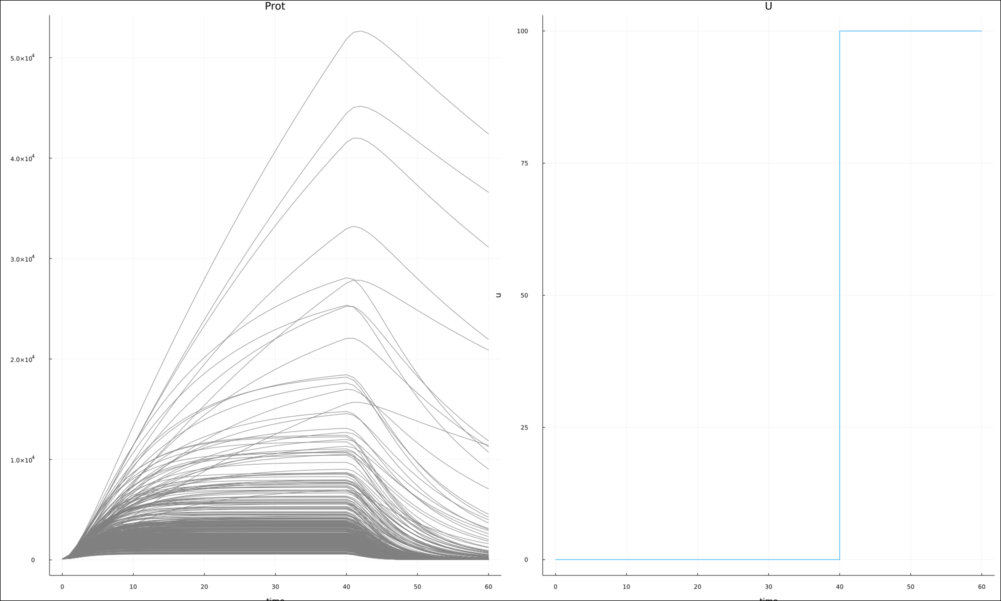

In [85]:
exp1 = load(string("Results\\",model_def["NameF"],"_",today(),"\\PlotOEDMCResults_Exp1","_",oedmc_def["flag"],".png"))

In [103]:
pseudo_def3 = defPseudoDatStruct();
pseudo_def3["Nexp"] = [1]; 
pseudo_def3["finalTime"] = [60]; 
pseudo_def3["switchT"] = [[0, 20, 40, 60]]; 
pseudo_def3["y0"] = [[10,100]]; 
pseudo_def3["preInd"] = [[0]]; 
pseudo_def3["uInd"] = [Array(oedmc_res["uInpOpt"]["U"]')]; 
pseudo_def3["theta"] = [3,10,0.8,3]; # Could be the directory and file name of a csv.
pseudo_def3["tsamps"] = [collect(0:1:60)];
pseudo_def3["plot"] = [false];
pseudo_def3["flag"] = ["JuliaConPseudoDatExamp3"];
pseudo_def3["Obs"] = ["Prot"]; 
pseudo_def3["NoiseType"] = ["hetero"];
pseudo_def3["Noise"] = [0.1];
pseudo_res3, model_def, pseudo_def3 = GenPseudoDat(model_def, pseudo_def3);



----------------------------------------- RESULTS -----------------------------------------
Pseudo-Data results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the name JuliaConExamp_2022-06-29_PseudoDataResults_JuliaConPseudoDatExamp3.jld
--------------------------------------------------------------------------------------


----------------------------------------- CSVs -----------------------------------------
Pseudo-Data CSVs with results have been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29\PseudoDataFiles
Under the names: 
        Simulations: JuliaConExamp_EXP(i)_JuliaConPseudoDatExamp3_Simulations.csv
        Observables: JuliaConExamp_EXP(i)_JuliaConPseudoDatExamp3_Observables.csv
        Event Inputs (only if the model has inputs): JuliaConExamp_EXP(i)_JuliaConPseudoDatExamp3_Event_Inputs.csv
------------

In [124]:
bayinf_def3 = defBayInfStruct();
bayinf_def3["Data"] = defBayInfDataFromFilesStruct();
bayinf_def3["StanSettings"] = defBasicStanSettingsStruct(); 
bayinf_def3["flag"] = ["JuliaConBayInfStanOEDMCSeq1"]; 
bayinf_def3["plot"] = [true]; 
bayinf_def3["runInf"] = [true];
bayinf_def3["MultiNormFit"] = [];
bayinf_def3["Data"]["Observables"] = [string(pseudo_def3["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def3["flag"], "_Observables.csv")]; 
bayinf_def3["Data"]["Inputs"] = [string(pseudo_def3["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def3["flag"], "_Event_Inputs.csv")]; 
bayinf_def3["Data"]["Obs"] = ["Prot"];
bayinf_def3["Data"]["y0"] = [[10,100]];
bayinf_def3["StanSettings"]["cmdstan_home"] = ["C:/Users/David/.cmdstanpy/cmdstan-2.20.0"];
bayinf_def3["StanSettings"]["nchains"] = [4];
bayinf_def3["StanSettings"]["nsamples"] = [1000];
bayinf_def3["StanSettings"]["nwarmup"] = [500];
bayinf_def3["StanSettings"]["printsummary"] = [true]; 
bayinf_def3["StanSettings"]["maxdepth"] = [10];
bayinf_def3["StanSettings"]["adaptdelta"] = [0.85];
bayinf_def3["StanSettings"]["jitter"] = [0.5];
bayinf_def3["StanSettings"]["init"] = [];
bayinf_def3["Priors"] = [5.0 30.0 1.0 5.0;
                        1.0 1.0 0.01 1.0]; 
                        
stan_res3, model_def, bayinf_def3 = StanInfer(model_def, bayinf_def3);

----------------------------------------- STAN INFERENCE INFO -----------------------------------------
Inference will be performed since there is enough information from the user:
Stan temporary files will be stored in your current working directory in the folder tmp.
--------------------------------------------------------------------------------------
-------------------------- WARNING!!! --------------------------
Please, be careful with the definition of parameters, transformations and prior distributions.
No check will be done in this section.

----------------------------------------- STAN MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_StanModel.stan
--------------------------------------------------------------------------------------


File e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\tmp\JuliaConExamp_Stan_JuliaConBa

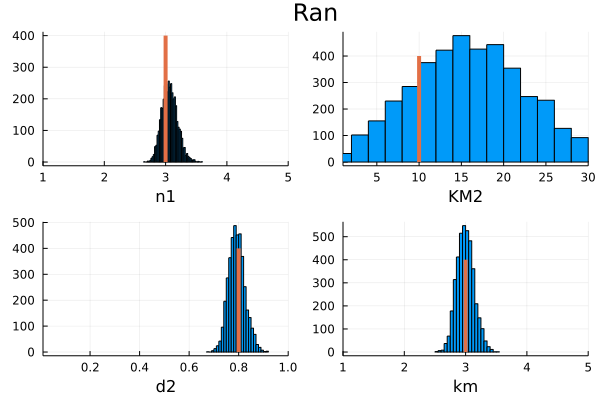

In [7]:
p1 = histogram(stan_res3["posterior"][:,1], label = "", xlabel = "n1", xlim = (1,5))
plot!([simul_def["theta"][1], simul_def["theta"][1]], [0,400], label = "", linewidth = 4)
p2 = histogram(stan_res3["posterior"][:,2], label = "", xlabel = "KM2", xlim = (1,30))
plot!([simul_def["theta"][2], simul_def["theta"][2]], [0,400], label = "", linewidth = 4)
p3 = histogram(stan_res3["posterior"][:,3], label = "", xlabel = "d2", xlim = (0.01,1))
plot!([simul_def["theta"][3], simul_def["theta"][3]], [0,400], label = "", linewidth = 4)
p4 = histogram(stan_res3["posterior"][:,4], label = "", xlabel = "km", xlim = (1,5))
plot!([simul_def["theta"][4], simul_def["theta"][4]], [0,400], label = "", linewidth = 4)

pp1=plot(p1,p2,p3,p4, plot_title = "Ran")

In [149]:
Random.seed!(19348473)

oedmc_def3 = defODEModelCalibrStruct()
oedmc_def3["Model"] = [model_def]; 
oedmc_def3["Obs"] = ["Prot"];
oedmc_def3["Theta"] = stan_res3["posterior"][sample(1:4000, 400, replace = false), :]; 
oedmc_def3["y0"] = [500,1500]; 
oedmc_def3["preInd"] = [0]; 
oedmc_def3["finalTime"] = [60]; 
oedmc_def3["switchT"] = [[0,20,40,60]]; 
oedmc_def3["tsamps"] = [collect(0:1:60)]; 
oedmc_def3["fixedInp"] = []; 
oedmc_def3["fixedStep"] = [];
oedmc_def3["equalStep"] = [];
oedmc_def3["plot"] = [true]; 
oedmc_def3["flag"] = ["JuliaConOEDmcSeq"]; 
oedmc_def3["uUpper"] = [100];
oedmc_def3["uLower"] = [0]; 
oedmc_def3["maxiter"] = [400];
oedmc_def3["util"] = [];
oedmc_def3 =  genOptimMCFuncts(oedmc_def3);
oedmc_res3, oedmc_def3 = mainOEDMC(oedmc_def3);


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_Model.jl
--------------------------------------------------------------------------------------


----------------------------------------- SCRIPTS OED Model Calibration -----------------------------------------
Utility function script to perform OED for Model Calibration has been generated in the directory: 
e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29\OEDModelCalibrationScripts\JuliaConExamp_OEDMC.jl
--------------------------------------------------------------------------------------


---------------------------------------------- OPTIMISATION INFO ----------------------------------------------

If you wish to modify any of the settings for the Bayesian Optimisation used (from the package 
BayesianOpt

┌ Info: 2022-06-29T11:51:11.346	iteration: 15	current optimum: 4885.012367775232
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T11:51:12.587	iteration: 16	current optimum: 4885.012367775232
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T11:51:13.125	iteration: 17	current optimum: 4885.012367775232
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T11:51:13.629	iteration: 18	current optimum: 4885.012367775232
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T11:51:14.146	iteration: 19	current optimum: 4885.012367775232
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info: 2022-06-29T1


----------------------------------------- RESULTS -----------------------------------------
OED for Model Calibration results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the name OEDModelCalibrationResults_JuliaConOEDmcSeq.jld
--------------------------------------------------------------------------------------


┌ Info: 2022-06-29T11:55:26.266	iteration: 399	current optimum: 7757.76869840282
└ @ BayesianOptimization C:\Users\david\.julia\packages\BayesianOptimization\nq1HY\src\BayesianOptimization.jl:140
┌ Info:  ────────────────────────────────────────────────────────────────────────────────
│                                         Time                    Allocations      
│                                ───────────────────────   ────────────────────────
│        Tot / % measured:             266s /  99.9%           49.9GiB / 100.0%    
│ 
│  Section               ncalls     time    %tot     avg     alloc    %tot      avg
│  ────────────────────────────────────────────────────────────────────────────────
│  function evaluation      400     255s   95.9%   637ms   46.5GiB   93.3%   119MiB
│  acquisition              386    9.33s    3.5%  24.2ms   3.21GiB    6.4%  8.50MiB
│  model hyperparamet...    386    1.63s    0.6%  4.22ms    120MiB    0.2%   317KiB
│  model update             386   56.2m



----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the names PlotOEDMCResults_Exp1_JuliaConOEDmcSeq.png and Plot_OEDMCConvergence_JuliaConOEDmcSeq.png
--------------------------------------------------------------------------------------



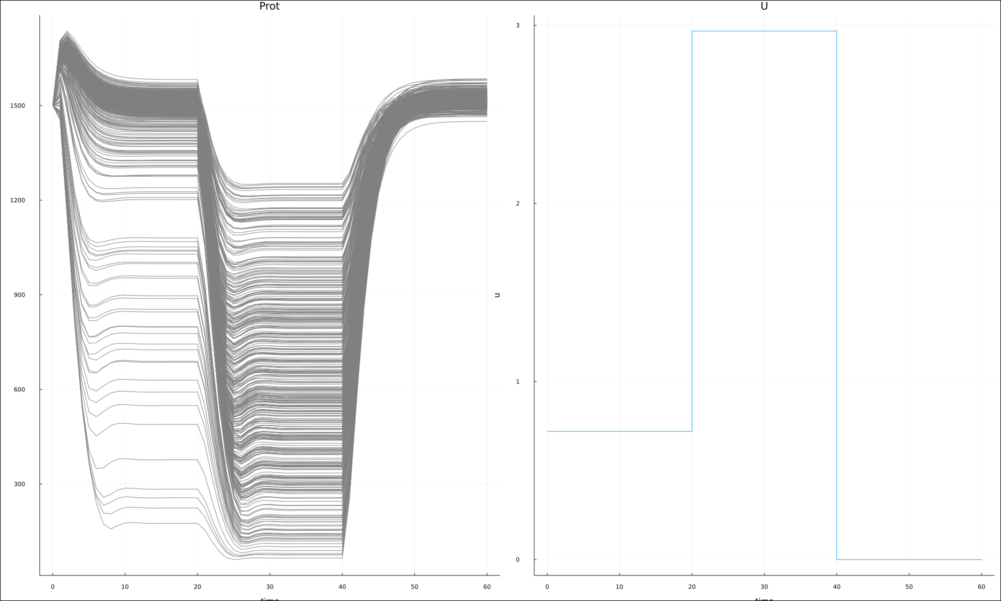

In [151]:
exp1 = load(string("Results\\",model_def["NameF"],"_",today(),"\\PlotOEDMCResults_Exp1","_",oedmc_def3["flag"],".png"))

In [152]:
pseudo_def4 = defPseudoDatStruct();
pseudo_def4["Nexp"] = [1]; 
pseudo_def4["finalTime"] = [60]; 
pseudo_def4["switchT"] = [[0, 20, 40, 60]]; 
pseudo_def4["y0"] = [[500,1500]]; 
pseudo_def4["preInd"] = [[0]]; 
pseudo_def4["uInd"] = [Array(oedmc_res3["uInpOpt"]["U"]')]; 
pseudo_def4["theta"] = [3,10,0.8,3]; # Could be the directory and file name of a csv.
pseudo_def4["tsamps"] = [collect(0:1:60)];
pseudo_def4["plot"] = [false];
pseudo_def4["flag"] = ["JuliaConPseudoDatExampSeq"];
pseudo_def4["Obs"] = ["Prot"]; 
pseudo_def4["NoiseType"] = ["hetero"];
pseudo_def4["Noise"] = [0.1];
pseudo_res4, model_def, pseudo_def4 = GenPseudoDat(model_def, pseudo_def4);


----------------------------------------- RESULTS -----------------------------------------
Pseudo-Data results are saved in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29
Under the name JuliaConExamp_2022-06-29_PseudoDataResults_JuliaConPseudoDatExampSeq.jld
--------------------------------------------------------------------------------------


----------------------------------------- CSVs -----------------------------------------
Pseudo-Data CSVs with results have been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\Results\JuliaConExamp_2022-06-29\PseudoDataFiles
Under the names: 
        Simulations: JuliaConExamp_EXP(i)_JuliaConPseudoDatExampSeq_Simulations.csv
        Observables: JuliaConExamp_EXP(i)_JuliaConPseudoDatExampSeq_Observables.csv
        Event Inputs (only if the model has inputs): JuliaConExamp_EXP(i)_JuliaConPseudoDatExampSeq_Event_Inputs.csv
----

In [153]:
bayinf_def4 = defBayInfStruct();
bayinf_def4["Data"] = defBayInfDataFromFilesStruct();
bayinf_def4["StanSettings"] = defBasicStanSettingsStruct(); 
bayinf_def4["flag"] = ["JuliaConBayInfStanOEDMCSeq2"]; 
bayinf_def4["plot"] = [true]; 
bayinf_def4["runInf"] = [true];
bayinf_def4["MultiNormFit"] = [];
bayinf_def4["Data"]["Observables"] = [string(pseudo_def4["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def4["flag"], "_Observables.csv")]; 
bayinf_def4["Data"]["Inputs"] = [string(pseudo_def4["savepath"], "\\PseudoDataFiles\\",model_def["NameF"], "_EXP",1,"_",pseudo_def4["flag"], "_Event_Inputs.csv")]; 
bayinf_def4["Data"]["Obs"] = ["Prot"];
bayinf_def4["Data"]["y0"] = [[500,1500]];
bayinf_def4["StanSettings"]["cmdstan_home"] = ["C:/Users/David/.cmdstanpy/cmdstan-2.20.0"];
bayinf_def4["StanSettings"]["nchains"] = [4];
bayinf_def4["StanSettings"]["nsamples"] = [1000];
bayinf_def4["StanSettings"]["nwarmup"] = [500];
bayinf_def4["StanSettings"]["printsummary"] = [true]; 
bayinf_def4["StanSettings"]["maxdepth"] = [10];
bayinf_def4["StanSettings"]["adaptdelta"] = [0.85];
bayinf_def4["StanSettings"]["jitter"] = [0.5];
bayinf_def4["StanSettings"]["init"] = [];



bayinf_def4["Priors"] = stan_res3["posterior"]; 

In [154]:
stan_res4, model_def, bayinf_def4 = StanInfer(model_def, bayinf_def4);

----------------------------------------- STAN INFERENCE INFO -----------------------------------------
Inference will be performed since there is enough information from the user:
Stan temporary files will be stored in your current working directory in the folder tmp.
--------------------------------------------------------------------------------------
-------------------------- WARNING!!! --------------------------
Please, be careful with the definition of parameters, transformations and prior distributions.
No check will be done in this section.

----------------------------------------- STAN MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\ModelsFunctions\JuliaConExamp_StanModel.stan
--------------------------------------------------------------------------------------


File e:\UNI\D_Drive\PhD\Year_1\2022_06_23_JuliaCon2022\tmp\JuliaConExamp_Stan_JuliaConBa

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: CVode failed with error flag -4  (in 'e:/UNI/D_Drive/PhD/Year_1/2022_06_23_JuliaCon2022/tmp/JuliaConExamp_Stan_JuliaConBayInfStanOEDMCSeq2.stan' at line 163)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



File -c not found
File JuliaConExamp_Stan_JuliaConBayInfStanOEDMCSeq2_summary.csv not found
Inference for Stan model: JuliaConExamp_Stan_JuliaConBayInfStanOEDMCSeq2_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (52, 58, 50, 57) seconds, 3.6 minutes total
Sampling took (51, 43, 56, 52) seconds, 3.4 minutes total

                    Mean     MCSE  StdDev     5%       50%    95%  N_Eff  N_Eff/s    R_hat
lp__           -3.5e+001 3.6e-002     1.4    -38 -3.5e+001    -33   1533      7.6 1.0e+000
accept_stat__   9.5e-001 8.1e-003   0.084   0.78  9.8e-001    1.0    106     0.53 1.0e+000
stepsize__      3.2e-001 3.7e-002    0.10   0.16  3.1e-001   0.51    7.9    0.039 1.2e+000
treedepth__     3.3e+000 7.4e-002    0.77    2.0  3.0e+000    4.0    107     0.53 1.0e+000
n_leapfrog__    1.3e+001 6.2e-001     7.4    3.0  1.5e+001     31    144     0.71 1.0e+000
divergent__     0.0e+000 0.0e+000    0.00   0.00  0.0e+000   0

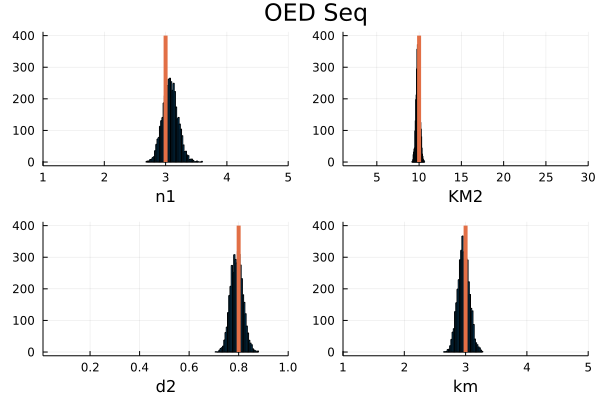

In [9]:
p1c = histogram(stan_res4["posterior"][:,1], label = "", xlabel = "n1", xlim = (1,5))
plot!([simul_def["theta"][1], simul_def["theta"][1]], [0,400], label = "", linewidth = 4)
p2c = histogram(stan_res4["posterior"][:,2], label = "", xlabel = "KM2", xlim = (1,30))
plot!([simul_def["theta"][2], simul_def["theta"][2]], [0,400], label = "", linewidth = 4)
p3c = histogram(stan_res4["posterior"][:,3], label = "", xlabel = "d2", xlim = (0.01,1))
plot!([simul_def["theta"][3], simul_def["theta"][3]], [0,400], label = "", linewidth = 4)
p4c = histogram(stan_res4["posterior"][:,4], label = "", xlabel = "km", xlim = (1,5))
plot!([simul_def["theta"][4], simul_def["theta"][4]], [0,400], label = "", linewidth = 4)

pp3 = plot(p1c,p2c,p3c,p4c, plot_title = "OED Seq")

display(pp3)

# ---------------------------- THE END ----------------------------